In [1]:
import os
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error
import math


Bad key "text.kerning_factor" on line 4 in
C:\Users\EhlimanaJugo\anaconda3\envs\Ehlimana\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
file=pd.read_excel("Merged files_2.xlsx",header=0)

In [3]:
X=file.loc[:,["Datum i vrijeme",#'Kalorimetar 1 39024788Temp.pol.voda (°C)',
       #'Kalorimetar 1 39024788Temp.pov.voda (°C)', 
        'Temp.senzor vanj.1 25000099Temperatura (°C)',
       #'Temp.senzor vanj.1 25000099Vlažnost (%)', 
        'Grijanje_K1','Broj sati grijanja_K1','Negrijano',
       'Sat', 'Dan u sedmici',
       'Mjesec', 'Godina', 'Kvartal', 'Dan u godini', 'Dan u mjesecu',
       #'Sedmica',
        "T prost (t-1)","T vanj(t-1)","T pol (t-1)","T pov (t-1)","Praznik","Radni sati"]]

In [4]:
X.set_index(file["Datum i vrijeme"]).head(2)

,Datum i vrijeme,Temp.senzor vanj.1 25000099Temperatura (°C),Grijanje_K1,Broj sati grijanja_K1,Negrijano,Sat,Dan u sedmici,Mjesec,Godina,Kvartal,Dan u godini,Dan u mjesecu,T prost (t-1),T vanj(t-1),T pol (t-1),T pov (t-1),Praznik,Radni sati
Datum i vrijeme,,,,,,,,,,,,,,,,,,
2015-10-01 01:00:00,2015-10-01 01:00:00,11.12,0,-1,0.000000e+00,1,3,10,2015,4,274,1,21.11,11.14,18.3,19.5,0,0
2015-10-01 02:00:00,2015-10-01 02:00:00,10.88,0,-1,3.702330e-212,2,3,10,2015,4,274,1,21.06,11.12,18.3,19.4,0,0


In [5]:
X["Negrijano"]=X["Negrijano"].fillna(0)

In [6]:
Y=file.loc[:, ['Temp.senzor un.4 24004658Temperatura (°C)']]

In [7]:
feat_and_lab=pd.concat([X,Y],axis=1)

In [8]:
feat_and_lab.head(2)

,Datum i vrijeme,Temp.senzor vanj.1 25000099Temperatura (°C),Grijanje_K1,Broj sati grijanja_K1,Negrijano,Sat,Dan u sedmici,Mjesec,Godina,Kvartal,Dan u godini,Dan u mjesecu,T prost (t-1),T vanj(t-1),T pol (t-1),T pov (t-1),Praznik,Radni sati,Temp.senzor un.4 24004658Temperatura (°C)
0,2015-10-01 01:00:00,11.12,0,-1,0.000000e+00,1,3,10,2015,4,274,1,21.11,11.14,18.3,19.5,0,0,21.06
1,2015-10-01 02:00:00,10.88,0,-1,3.702330e-212,2,3,10,2015,4,274,1,21.06,11.12,18.3,19.4,0,0,21.04


In [9]:
feat_and_lab.isna().sum()

Datum i vrijeme                                0
Temp.senzor vanj.1 25000099Temperatura (°C)    2
Grijanje_K1                                    0
Broj sati grijanja_K1                          0
Negrijano                                      0
Sat                                            0
Dan u sedmici                                  0
Mjesec                                         0
Godina                                         0
Kvartal                                        0
Dan u godini                                   0
Dan u mjesecu                                  0
T prost (t-1)                                  0
T vanj(t-1)                                    0
T pol (t-1)                                    0
T pov (t-1)                                    0
Praznik                                        0
Radni sati                                     0
Temp.senzor un.4 24004658Temperatura (°C)      3
dtype: int64

In [31]:
feat_and_lab=feat_and_lab.interpolate(method ="bfill")

In [41]:
from statsmodels.tsa.seasonal import seasonal_decompose

core_columns =  [
    'Temp.senzor vanj.1 25000099Temperatura (°C)',"T prost (t-1)", 'T vanj(t-1)', 
    'T pol (t-1)', 'T pov (t-1)',"Temp.senzor un.4 24004658Temperatura (°C)"
]

for column in core_columns:
    decomp = seasonal_decompose(feat_and_lab[column], period=24, model='additive', extrapolate_trend='freq')
    feat_and_lab[f"{column}_trend"] = decomp.trend
    feat_and_lab[f"{column}_seasonal"] = decomp.seasonal

C:\Users\EhlimanaJugo\anaconda3\envs\Ehlimana\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  
C:\Users\EhlimanaJugo\anaconda3\envs\Ehlimana\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  
C:\Users\EhlimanaJugo\anaconda3\envs\Ehlimana\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  
C:\Users\EhlimanaJugo\anaconda3\envs\Ehlimana\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  
C:\Users\EhlimanaJugo\anaconda3\envs\Ehlimana\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  
C:\Users\EhlimanaJugo\anaconda3\envs\Ehlimana\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  


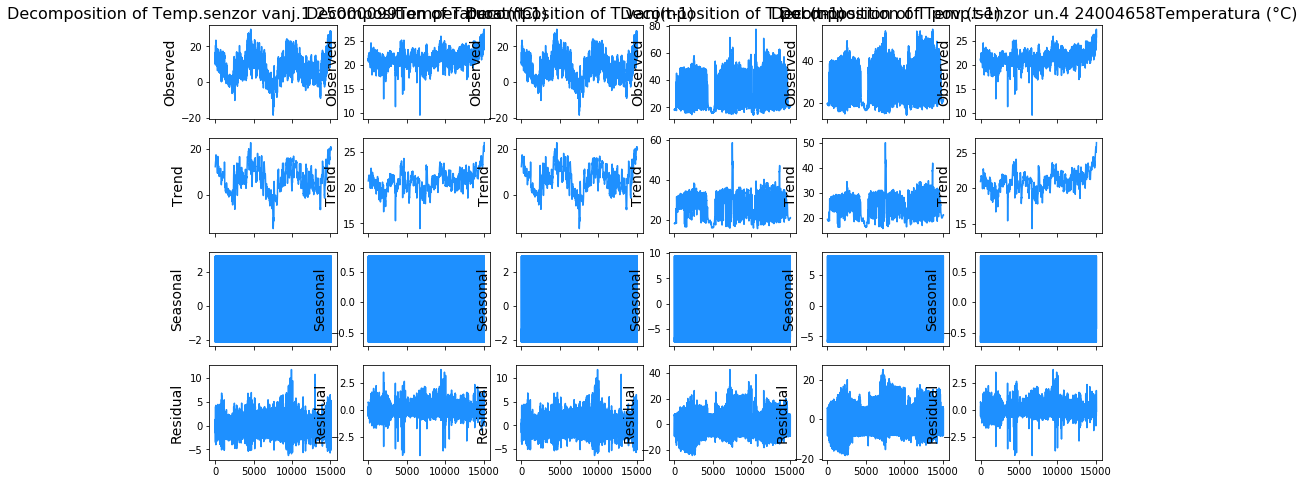

In [42]:
fig, ax = plt.subplots(ncols=6, nrows=4, sharex=True, figsize=(16,8))

for i, column in enumerate(['Temp.senzor vanj.1 25000099Temperatura (°C)',"T prost (t-1)", 'T vanj(t-1)', 
    'T pol (t-1)', 'T pov (t-1)',"Temp.senzor un.4 24004658Temperatura (°C)"]):
    
    res = seasonal_decompose(feat_and_lab[column], freq=24, model='additive', extrapolate_trend='freq')

    ax[0,i].set_title('Decomposition of {}'.format(column), fontsize=16)
    res.observed.plot(ax=ax[0,i], legend=False, color='dodgerblue')
    ax[0,i].set_ylabel('Observed', fontsize=14)

    res.trend.plot(ax=ax[1,i], legend=False, color='dodgerblue')
    ax[1,i].set_ylabel('Trend', fontsize=14)

    res.seasonal.plot(ax=ax[2,i], legend=False, color='dodgerblue')
    ax[2,i].set_ylabel('Seasonal', fontsize=14)
    
    res.resid.plot(ax=ax[3,i], legend=False, color='dodgerblue')
    ax[3,i].set_ylabel('Residual', fontsize=14)

plt.show()

#XGB

In [10]:
split_date = '10/01/2017  00:00:00 AM'
feat_train = feat_and_lab.loc[feat_and_lab["Datum i vrijeme"] <= split_date].copy()
feat_test = feat_and_lab.loc[feat_and_lab["Datum i vrijeme"]> split_date].copy()

In [11]:
len(feat_train.columns)

19

In [12]:
import xgboost as xgb
from xgboost import plot_importance

In [13]:
reg = xgb.XGBRegressor(n_estimators=10000)
reg.fit(feat_train.iloc[:,1:18], feat_train.iloc[:,18],
        eval_set=[(feat_train.iloc[:,1:18], feat_train.iloc[:,16]), (feat_test.iloc[:,1:18], feat_test.iloc[:,18])],
        early_stopping_rounds=50,
       verbose=False) # Change verbose to True if you want to see it train

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=10000, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

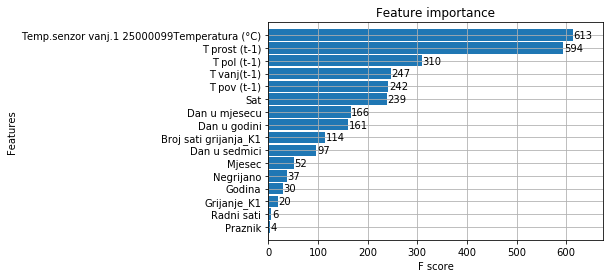

In [14]:
plot_importance(reg, height=0.9)
plt.show()

In [41]:
feat_test.columns

Index(['Datum i vrijeme', 'Temp.senzor vanj.1 25000099Temperatura (°C)',
       'Grijanje_K1', 'Broj sati grijanja_K1', 'Negrijano', 'Sat',
       'Dan u sedmici', 'Mjesec', 'Godina', 'Kvartal', 'Dan u godini',
       'Dan u mjesecu', 'T prost (t-1)', 'T vanj(t-1)', 'T pol (t-1)',
       'T pov (t-1)', 'Praznik', 'Radni sati',
       'Temp.senzor un.4 24004658Temperatura (°C)'],
      dtype='object')

In [43]:
feat_test['Prediction'] = reg.predict(feat_test.iloc[:,1:18])

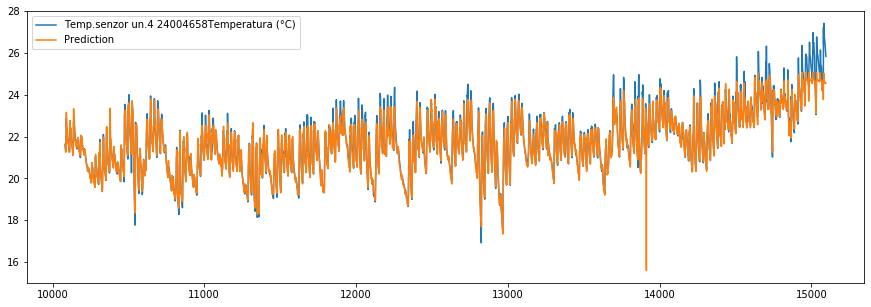

In [44]:
feat_test[['Temp.senzor un.4 24004658Temperatura (°C)','Prediction']].plot(figsize=(15, 5))
plt.show()

In [45]:
feat_test['error'] =feat_test['Temp.senzor un.4 24004658Temperatura (°C)'] - feat_test['Prediction']
feat_test['abs_error'] = feat_test['error'].apply(np.abs)
error_by_day = feat_test.groupby(['Godina','Mjesec','Dan u mjesecu']) \
    .mean()[['Temp.senzor un.4 24004658Temperatura (°C)','Prediction','error','abs_error']]

In [46]:
error_by_day.sort_values('error', ascending=True).head(10)

Temp.senzor un.4 24004658Temperatura (°C)  \
Godina Mjesec Dan u mjesecu                                              
2017   11     22                                             19.597083   
              20                                             20.067500   
              1                                              19.775417   
              27                                             20.142083   
              18                                             20.427917   
              21                                             20.451667   
              19                                             19.424583   
              23                                             20.015417   
              25                                             20.878750   
       12     24                                             19.735417   

                             Prediction     error  abs_error  
Godina Mjesec Dan u mjesecu                                   
2017   11     22              19.822567 -0.225485   0.285446  
              20              20.179567 -0.112068   0.177921  
              1               19.882971 -0.107555   0.303288  
              27              20.248308 -0.106225   0.145147  
              18              20.528276 -0.100361   0.169846  
              21              20.551859 -0.100192   0.224718  
              19              19.510302 -0.085718   0.131321  
              23              20.096075 -0.080659   0.294644  
              25              20.956081 -0.077332   0.109799  
       12     24              19.800388 -0.064972   0.095249

In [47]:
error_by_day.sort_values('abs_error', ascending=True).head(10)

Temp.senzor un.4 24004658Temperatura (°C)  \
Godina Mjesec Dan u mjesecu                                              
2017   11     12                                             20.853333   
              5                                              19.843750   
       10     7                                              20.397500   
              4                                              21.644167   
              5                                              21.560417   
              6                                              21.147500   
              14                                             20.917500   
2018   1      14                                             20.757083   
2017   11     26                                             19.983333   
       10     28                                             21.263750   

                             Prediction     error  abs_error  
Godina Mjesec Dan u mjesecu                                   
2017   11     12              20.858566 -0.005232   0.045965  
              5               19.831667  0.012082   0.048120  
       10     7               20.382183  0.015318   0.053523  
              4               21.651804 -0.007637   0.057293  
              5               21.557003  0.003413   0.067129  
              6               21.122875  0.024624   0.067137  
              14              20.923235 -0.005735   0.067349  
2018   1      14              20.759214 -0.002132   0.072591  
2017   11     26              20.003946 -0.020612   0.073360  
       10     28              21.291965 -0.028215   0.073613

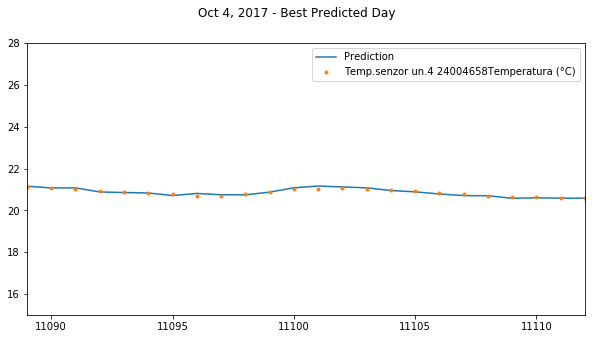

In [48]:
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(10)
_ =feat_test[['Prediction','Temp.senzor un.4 24004658Temperatura (°C)']].plot(ax=ax,
                                              style=['-','.'])
ax.set_xbound(lower=feat_test[feat_test["Datum i vrijeme"]=='11/12/2017  00:00:00 AM'].index.values, upper=feat_test[feat_test["Datum i vrijeme"]=='11/12/2017  11:00:00 PM'].index.values)
plot = plt.suptitle('Oct 4, 2017 - Best Predicted Day')
plt.show()

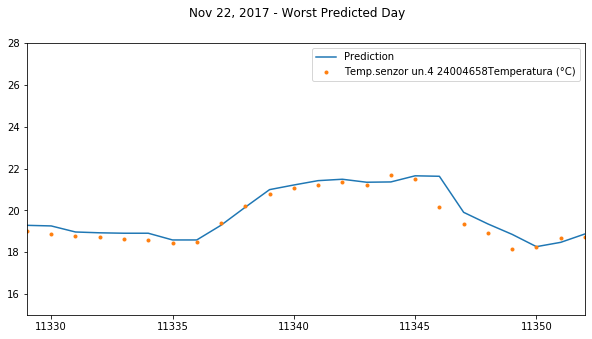

In [49]:
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(10)
_ =feat_test[['Prediction','Temp.senzor un.4 24004658Temperatura (°C)']].plot(ax=ax,
                                              style=['-','.'])
ax.set_xbound(lower=feat_test[feat_test["Datum i vrijeme"]=='11/22/2017  00:00:00 AM'].index.values, upper=feat_test[feat_test["Datum i vrijeme"]=='11/22/2017  11:00:00 PM'].index.values)
plot = plt.suptitle('Nov 22, 2017 - Worst Predicted Day')
plt.show()

In [50]:
# Calcuate metrics


score_mae = mean_absolute_error(feat_test['Temp.senzor un.4 24004658Temperatura (°C)'], feat_test['Prediction'])
score_rmse = math.sqrt(mean_absolute_error(feat_test['Temp.senzor un.4 24004658Temperatura (°C)'], feat_test['Prediction']))

print('RMSE: {}'.format(score_rmse))

RMSE: 0.43776497169369566


In [57]:
for col in feat_and_lab.columns:
    feat_and_lab[col] = feat_and_lab[col].interpolate(method="bfill")

In [51]:
feat_and_lab.columns

Index(['Datum i vrijeme', 'Temp.senzor vanj.1 25000099Temperatura (°C)',
       'Grijanje_K1', 'Broj sati grijanja_K1', 'Negrijano', 'Sat',
       'Dan u sedmici', 'Mjesec', 'Godina', 'Kvartal', 'Dan u godini',
       'Dan u mjesecu', 'T prost (t-1)', 'T vanj(t-1)', 'T pol (t-1)',
       'T pov (t-1)', 'Praznik', 'Radni sati',
       'Temp.senzor un.4 24004658Temperatura (°C)'],
      dtype='object')

In [113]:
columns1=feat_and_lab.columns
downsample=feat_and_lab[columns1].resample("1D", on="Datum i vrijeme").mean()

feat_and_lab_1= downsample.copy()

In [116]:
feat_and_lab.isna().sum()

Datum i vrijeme                                0
Temp.senzor vanj.1 25000099Temperatura (°C)    0
Grijanje_K1                                    0
Broj sati grijanja_K1                          0
Negrijano                                      0
Sat                                            0
Dan u sedmici                                  0
Mjesec                                         0
Godina                                         0
Kvartal                                        0
Dan u godini                                   0
Dan u mjesecu                                  0
T prost (t-1)                                  0
T vanj(t-1)                                    0
T pol (t-1)                                    0
T pov (t-1)                                    0
Temp.senzor un.4 24004658Temperatura (°C)      0
dtype: int64

In [52]:


feat_and_lab ['Sezona'] = feat_and_lab['Mjesec'] % 12 // 3 + 1


In [59]:
from statsmodels.tsa.arima_model import ARIMA
#aa=feat_and_lab.index.values
aa=feat_and_lab.index

In [60]:
feat_and_lab.columns

Index(['Datum i vrijeme', 'Temp.senzor vanj.1 25000099Temperatura (°C)',
       'Grijanje_K1', 'Broj sati grijanja_K1', 'Negrijano', 'Sat',
       'Dan u sedmici', 'Mjesec', 'Godina', 'Kvartal', 'Dan u godini',
       'Dan u mjesecu', 'T prost (t-1)', 'T vanj(t-1)', 'T pol (t-1)',
       'T pov (t-1)', 'Praznik', 'Radni sati',
       'Temp.senzor un.4 24004658Temperatura (°C)', 'Sezona'],
      dtype='object')

In [62]:
#univariate_df["Datum i vrijeme"]=aa
univariate_df=pd.DataFrame()
#univariate_df["Temp.senzor vanj.1 25000099Temperatura (°C)"]=feat_and_lab_1["Temp.senzor vanj.1 25000099Temperatura (°C)"].values
univariate_df['T pol (t-1)']=feat_and_lab['T pol (t-1)'].values
univariate_df['T pov (t-1)']=feat_and_lab['T pov (t-1)'].values
univariate_df['T vanj(t-1)']=feat_and_lab['T vanj(t-1)'].values
univariate_df['T prost (t-1)']=feat_and_lab['T prost (t-1)'].values
univariate_df['Grijanje_K1']=feat_and_lab['Grijanje_K1'].values
univariate_df[ 'Broj sati grijanja']=feat_and_lab[ 'Broj sati grijanja_K1'].values
univariate_df[ 'Negrijano']=feat_and_lab[ 'Negrijano'].values
univariate_df[ 'Sat']=feat_and_lab[ 'Sat'].values
univariate_df[ 'Dan u sedmici']=feat_and_lab[ 'Dan u sedmici'].values
univariate_df[  'Mjesec']=feat_and_lab[ 'Mjesec'].values
univariate_df[ 'Godina']=feat_and_lab[ 'Godina'].values
univariate_df[ 'Kvartal']=feat_and_lab[ 'Kvartal'].values
univariate_df[ 'Dan u godini']=feat_and_lab['Dan u godini'].values
univariate_df[ 'Dan u mjesecu']=feat_and_lab[ 'Dan u mjesecu'].values
univariate_df[ 'Praznik']=feat_and_lab[ 'Praznik'].values
univariate_df['Radni sati']=feat_and_lab[ 'Radni sati'].values
univariate_df["Temp "]=feat_and_lab['Temp.senzor un.4 24004658Temperatura (°C)'].values



#univariate_df["Plin, m3"]=feat_and_lab_1["Plin, m3"].values

In [63]:
univariate_df.corr()

,T pol (t-1),T pov (t-1),T vanj(t-1),T prost (t-1),Grijanje_K1,Broj sati grijanja,Negrijano,Sat,Dan u sedmici,Mjesec,Godina,Kvartal,Dan u godini,Dan u mjesecu,Praznik,Radni sati,Temp
T pol (t-1),1.000000,0.975526,-0.156268,0.294100,0.709569,0.671721,-0.027382,0.196047,-0.236728,-0.037135,0.060949,-0.063420,-0.033673,0.042537,-0.056705,0.542715,0.345322
T pov (t-1),0.975526,1.000000,-0.122887,0.345683,0.699916,0.696692,-0.055929,0.192070,-0.227348,-0.055994,0.097513,-0.079739,-0.052744,0.039491,-0.056461,0.587146,0.391244
T vanj(t-1),-0.156268,-0.122887,1.000000,0.524344,-0.263466,-0.212524,-0.065933,0.190910,0.014894,0.001266,-0.004168,0.051633,-0.005902,-0.084084,-0.040358,0.154258,0.504294
T prost (t-1),0.294100,0.345683,0.524344,1.000000,0.072784,0.177589,-0.075871,0.218840,-0.028383,-0.204366,0.387024,-0.178270,-0.201047,0.060024,-0.084157,0.280720,0.979419
Grijanje_K1,0.709569,0.699916,-0.263466,0.072784,1.000000,0.817594,0.243998,-0.006658,-0.168368,-0.028307,0.062861,-0.053811,-0.026535,0.018524,-0.022794,0.444571,0.164618
Broj sati grijanja,0.671721,0.696692,-0.212524,0.177589,0.817594,1.000000,0.002433,0.090174,-0.157187,-0.044248,0.063985,-0.062408,-0.043356,0.003975,-0.022540,0.441534,0.221569
Negrijano,-0.027382,-0.055929,-0.065933,-0.075871,0.243998,0.002433,1.000000,-0.070456,-0.044596,-0.041996,0.023739,-0.044947,-0.041404,0.007593,-0.011418,-0.058755,-0.037796
Sat,0.196047,0.192070,0.190910,0.218840,-0.006658,0.090174,-0.070456,1.000000,-0.000625,0.001230,-0.000993,0.000919,0.001286,0.000748,0.000171,0.168570,0.185139
Dan u sedmici,-0.236728,-0.227348,0.014894,-0.028383,-0.168368,-0.157187,-0.044596,-0.000625,1.000000,0.010856,-0.009017,0.010446,0.010842,0.001140,0.079911,0.000309,-0.036996
Mjesec,-0.037135,-0.055994,0.001266,-0.204366,-0.028307,-0.044248,-0.041996,0.001230,0.010856,1.000000,-0.509434,0.981146,0.997753,0.030781,0.013652,0.000467,-0.205073


In [64]:
len(univariate_df.columns)


17

In [65]:
train_size = int(0.85 * len(feat_and_lab))
test_size = len(feat_and_lab) - train_size


train = univariate_df.iloc[:train_size, :]

x_train, y_train = pd.DataFrame((univariate_df.iloc[:train_size, :16])),  pd.DataFrame((univariate_df.iloc[:train_size,16]))
x_valid, y_valid = pd.DataFrame((univariate_df.iloc[train_size:,:16])), pd.DataFrame((univariate_df.iloc[train_size:, 16]))

print(len(train), len(x_valid))

12832 2265


In [66]:
y_valid

,Temp
12832,22.12
12833,22.22
12834,21.67
12835,21.12
12836,20.83
...,...
15092,26.18
15093,26.07
15094,25.99
15095,25.89


In [67]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import math

In [68]:
y_train

,Temp
0,21.06
1,21.04
2,21.01
3,20.98
4,20.94
...,...
12827,20.28
12828,20.90
12829,21.43
12830,21.82


In [69]:
y_train.isna().sum()

Temp     0
dtype: int64

In [70]:
y_train.interpolate()

,Temp
0,21.06
1,21.04
2,21.01
3,20.98
4,20.94
...,...
12827,20.28
12828,20.90
12829,21.43
12830,21.82


In [71]:
# Fit model
model = ARIMA(y_train.interpolate(), order=(0,0,0))
model_fit = model.fit()

# Prediction with ARIMA
y_pred, se, conf = model_fit.forecast(2265)

# Calcuate metrics
score_mae = mean_absolute_error(y_valid, y_pred)
score_rmse = math.sqrt(mean_squared_error(y_valid, y_pred))

print('RMSE: {}'.format(score_rmse))

RMSE: 2.2301562556268206


C:\Users\EhlimanaJugo\anaconda3\envs\Ehlimana\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [72]:
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm
model = pm.auto_arima(y_train.interpolate(), start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=4990.877, Time=1.49 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=114376.034, Time=0.09 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.47 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.88 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=4403.505, Time=0.93 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.33 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=4399.133, Time=1.85 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=inf, Time=1.42 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=4407.035, Time=6.96 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=4393.824, Time=1.42 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=4539.951, Time=0.84 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=4389.909, Time=2.34 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=4393.366, Time=1.03 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=4406.083, Time=10.46 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=3933.195

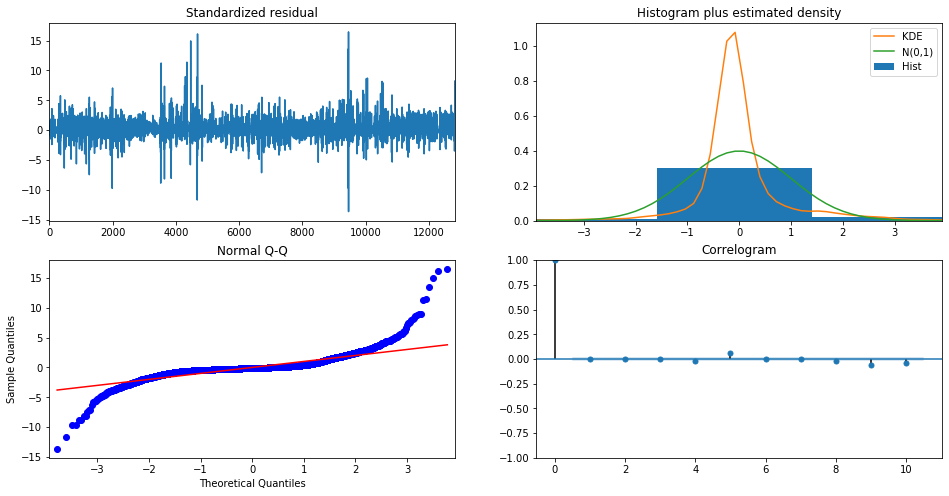

In [73]:
model.plot_diagnostics(figsize=(16,8))
plt.show()


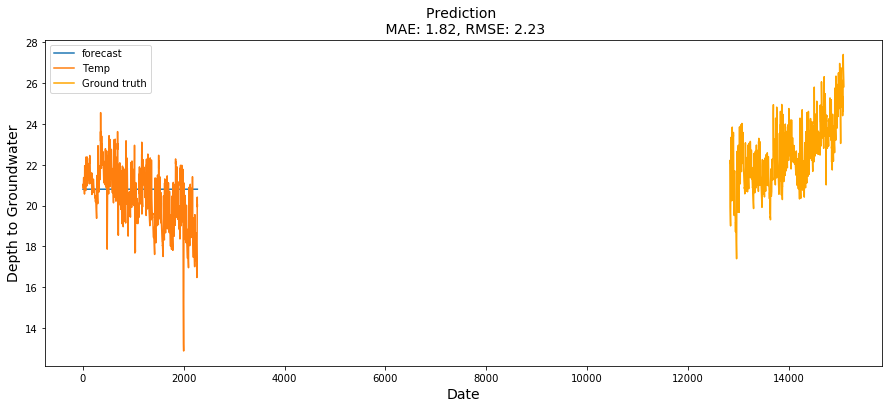

In [74]:
f, ax = plt.subplots(1)
f.set_figheight(6)
f.set_figwidth(15)

model_fit.plot_predict(1, 2270, ax=ax)
sns.lineplot(x=x_valid.index, y=y_valid['Temp '], ax=ax, color='orange', label='Ground truth') #navajowhite

ax.set_title(f'Prediction \n MAE: {score_mae:.2f}, RMSE: {score_rmse:.2f}', fontsize=14)
ax.set_xlabel(xlabel='Date', fontsize=14)
ax.set_ylabel(ylabel='Depth to Groundwater', fontsize=14)

plt.show()

In [83]:
#univariate_df["Datum i vrijeme"]=aa
univariate_df=pd.DataFrame()
#univariate_df["Temp.senzor vanj.1 25000099Temperatura (°C)"]=feat_and_lab_1["Temp.senzor vanj.1 25000099Temperatura (°C)"].values
univariate_df['T pol (t-1)']=feat_and_lab['T pol (t-1)'].values
univariate_df['T pov (t-1)']=feat_and_lab['T pov (t-1)'].values
univariate_df['T vanj(t-1)']=feat_and_lab['T vanj(t-1)'].values
univariate_df['T prost (t-1)']=feat_and_lab['T prost (t-1)'].values
univariate_df['Grijanje_K1']=feat_and_lab['Grijanje_K1'].values
univariate_df[ 'Broj sati grijanja']=feat_and_lab[ 'Broj sati grijanja_K1'].values
univariate_df[ 'Negrijano']=feat_and_lab[ 'Negrijano'].values
univariate_df[ 'Sat']=feat_and_lab[ 'Sat'].values
univariate_df[ 'Dan u sedmici']=feat_and_lab[ 'Dan u sedmici'].values
univariate_df[  'Mjesec']=feat_and_lab[ 'Mjesec'].values
univariate_df[ 'Godina']=feat_and_lab[ 'Godina'].values
univariate_df[ 'Kvartal']=feat_and_lab[ 'Kvartal'].values
univariate_df[ 'Dan u godini']=feat_and_lab['Dan u godini'].values
univariate_df[ 'Dan u mjesecu']=feat_and_lab[ 'Dan u mjesecu'].values
univariate_df[ 'Datum i vrijeme']=feat_and_lab[ 'Datum i vrijeme'].values

univariate_df["Temp "]=feat_and_lab['Temp.senzor un.4 24004658Temperatura (°C)'].values



#univariate_df["Plin, m3"]=feat_and_lab_1["Plin, m3"].values

In [84]:
univariate_df

,T pol (t-1),T pov (t-1),T vanj(t-1),T prost (t-1),Grijanje_K1,Broj sati grijanja,Negrijano,Sat,Dan u sedmici,Mjesec,Godina,Kvartal,Dan u godini,Dan u mjesecu,Datum i vrijeme,Temp
0,18.3,19.5,11.14,21.11,0,-1,0.000000e+00,1,3,10,2015,4,274,1,2015-10-01 01:00:00,21.06
1,18.3,19.4,11.12,21.06,0,-1,3.702330e-212,2,3,10,2015,4,274,1,2015-10-01 02:00:00,21.04
2,18.3,19.3,10.88,21.04,0,-1,3.704228e-212,3,3,10,2015,4,274,1,2015-10-01 03:00:00,21.01
3,18.2,19.2,10.86,21.01,0,-1,3.706128e-212,4,3,10,2015,4,274,1,2015-10-01 04:00:00,20.98
4,18.1,19.1,10.80,20.98,0,-1,3.708027e-212,5,3,10,2015,4,274,1,2015-10-01 05:00:00,20.94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15092,20.8,21.1,22.14,26.29,0,-1,9.999239e-207,19,5,4,2018,2,118,28,2018-04-28 19:00:00,26.18
15093,20.9,21.1,21.04,26.18,0,-1,1.000422e-206,20,5,4,2018,2,118,28,2018-04-28 20:00:00,26.07
15094,20.9,21.2,20.28,26.07,0,-1,1.000920e-206,21,5,4,2018,2,118,28,2018-04-28 21:00:00,25.99
15095,20.9,21.2,20.12,25.99,0,-1,1.001418e-206,22,5,4,2018,2,118,28,2018-04-28 22:00:00,25.89


In [85]:
univariate_df.columns

Index(['T pol (t-1)', 'T pov (t-1)', 'T vanj(t-1)', 'T prost (t-1)',
       'Grijanje_K1', 'Broj sati grijanja', 'Negrijano', 'Sat',
       'Dan u sedmici', 'Mjesec', 'Godina', 'Kvartal', 'Dan u godini',
       'Dan u mjesecu', 'Datum i vrijeme', 'Temp '],
      dtype='object')

In [86]:
feature_columns = [
    'T pol (t-1)',
    'T pov (t-1)',
    'T vanj(t-1)',
    'T prost (t-1)',
    'Grijanje_K1', 'Broj sati grijanja', 'Negrijano', 'Sat',
       'Dan u sedmici', 'Mjesec', 'Godina', 'Kvartal', 'Dan u godini',
       'Dan u mjesecu', 'Datum i vrijeme']
target_column = ['Temp ']
feature_columns[1:]

['T pov (t-1)',
 'T vanj(t-1)',
 'T prost (t-1)',
 'Grijanje_K1',
 'Broj sati grijanja',
 'Negrijano',
 'Sat',
 'Dan u sedmici',
 'Mjesec',
 'Godina',
 'Kvartal',
 'Dan u godini',
 'Dan u mjesecu',
 'Datum i vrijeme']

In [87]:

train_size = int(0.85 * len(univariate_df))

multivariate_df = univariate_df[['Datum i vrijeme','Temp ','T pol (t-1)','T pov (t-1)',
 'T vanj(t-1)',
 'T prost (t-1)',
 'Grijanje_K1',
 'Broj sati grijanja',
 'Negrijano',
 'Sat',
 'Dan u sedmici',
 'Mjesec',
 'Godina',
 'Kvartal',
 'Dan u godini',
 'Dan u mjesecu']].copy()
multivariate_df.columns = ['ds', 'y','T pol (t-1)','T pov (t-1)','T vanj(t-1)','T prost (t-1)','Grijanje_K1','Broj sati grijanja','Negrijano',
 'Sat', 'Dan u sedmici','Mjesec','Godina','Kvartal','Dan u godini','Dan u mjesecu']

train = multivariate_df.iloc[:train_size, :]
x_train, y_train = pd.DataFrame(multivariate_df.iloc[:train_size, [0,2,3,4,5,6,7,8,9,10,11,12,13,14,15]]), pd.DataFrame(multivariate_df.iloc[:train_size, 1])
x_valid, y_valid = pd.DataFrame(multivariate_df.iloc[train_size:, [0,2,3,4,5,6,7,8,9,10,11,12,13,14,15]]), pd.DataFrame(multivariate_df.iloc[train_size:, 1])

train.head()


,ds,y,T pol (t-1),T pov (t-1),T vanj(t-1),T prost (t-1),Grijanje_K1,Broj sati grijanja,Negrijano,Sat,Dan u sedmici,Mjesec,Godina,Kvartal,Dan u godini,Dan u mjesecu
0,2015-10-01 01:00:00,21.06,18.3,19.5,11.14,21.11,0,-1,0.000000e+00,1,3,10,2015,4,274,1
1,2015-10-01 02:00:00,21.04,18.3,19.4,11.12,21.06,0,-1,3.702330e-212,2,3,10,2015,4,274,1
2,2015-10-01 03:00:00,21.01,18.3,19.3,10.88,21.04,0,-1,3.704228e-212,3,3,10,2015,4,274,1
3,2015-10-01 04:00:00,20.98,18.2,19.2,10.86,21.01,0,-1,3.706128e-212,4,3,10,2015,4,274,1
4,2015-10-01 05:00:00,20.94,18.1,19.1,10.80,20.98,0,-1,3.708027e-212,5,3,10,2015,4,274,1


In [88]:
# Train the model


from fbprophet import Prophet


# Train the model
model = Prophet()

model.add_regressor('T pol (t-1)')
model.add_regressor('T pov (t-1)')
model.add_regressor('T vanj(t-1)')
model.add_regressor('T prost (t-1)')
model.add_regressor('Grijanje_K1')
model.add_regressor('Broj sati grijanja')
model.add_regressor('Negrijano')
model.add_regressor('Sat')
model.add_regressor('Dan u sedmici')
model.add_regressor('Mjesec')
model.add_regressor('Godina')
model.add_regressor('Kvartal')
model.add_regressor('Dan u godini')
model.add_regressor('Dan u mjesecu')


# Fit the model with train set
model.fit(train)

# Predict on valid set
y_pred = model.predict(x_valid)

# Calcuate metrics
score_mae = mean_absolute_error(y_valid, y_pred['yhat'])
score_rmse = math.sqrt(mean_squared_error(y_valid, y_pred['yhat']))

print('RMSE: {}'.format(score_rmse))

RMSE: 0.2594570940078345


In [ ]:
from datetime import date
d0 = date(2015, 10, 15)
d1 = date(2016, 4, 15)
delta = d1 - d0
print(delta.days)

In [222]:
from sklearn.preprocessing import MinMaxScaler

data = univariate_df.filter(["Temp "])
#Convert the dataframe to a numpy array
dataset = data.values

In [154]:
dataset[1,:]

array([21.06])

In [216]:
scaler = MinMaxScaler(feature_range=(-1, 1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.29726715],
       [0.29168991],
       [0.28945901],
       ...,
       [0.84160625],
       [0.83045176],
       [0.82375906]])

In [162]:
x_train.shape

(12857, 15)

In [232]:
x_test=x_valid

In [226]:
x_test.shape

(2270, 15)

In [218]:
# reshape input to be [samples, time steps, features]

x_train = np.reshape(x_train, (x_train.shape[0], 1, x_train.shape[1]))
x_test = np.reshape(x_test, (x_test.shape[0], 1, 0))

print(len(x_train), len(x_test))

IndexError: tuple index out of range

In [138]:
x_train.shape

(12857, 1, 1)

In [228]:
y_test.shape

(2270,)

In [230]:
x_train=np.reshape(x_train,(x_train.shape[0],1,x_train.shape[1]))

In [233]:
x_test=np.reshape(x_test,(x_test.shape[0],1,x_test.shape[1]))

ValueError: Must pass 2-d input. shape=(2270, 1, 15)

In [229]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[0], x_train.shape[1])))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=5, validation_data=(x_test, y_valid))

model.summary()

Epoch 1/5


ValueError: in user code:

    C:\Users\Ehlimana\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:853 train_function  *
        return step_function(self, iterator)
    C:\Users\Ehlimana\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:842 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\Ehlimana\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\distribute\distribute_lib.py:1286 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\Ehlimana\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\distribute\distribute_lib.py:2849 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\Ehlimana\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\distribute\distribute_lib.py:3632 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\Ehlimana\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:835 run_step  **
        outputs = model.train_step(data)
    C:\Users\Ehlimana\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:787 train_step
        y_pred = self(x, training=True)
    C:\Users\Ehlimana\AppData\Roaming\Python\Python38\site-packages\keras\engine\base_layer.py:1020 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    C:\Users\Ehlimana\AppData\Roaming\Python\Python38\site-packages\keras\engine\input_spec.py:214 assert_input_compatibility
        raise ValueError('Input ' + str(input_index) + ' of layer ' +

    ValueError: Input 0 of layer sequential_5 is incompatible with the layer: expected ndim=3, found ndim=2. Full shape received: (1, 15)


In [ ]:
# Lets predict with the model
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)

# invert predictions
train_predict = scaler.inverse_transform(train_predict)
y_train = scaler.inverse_transform([y_train])

test_predict = scaler.inverse_transform(test_predict)
y_test = scaler.inverse_transform([y_test])

# Get the root mean squared error (RMSE) and MAE
score_rmse = np.sqrt(mean_squared_error(y_test[0], test_predict[:,0]))
score_mae = mean_absolute_error(y_test[0], test_predict[:,0])
print('RMSE: {}'.format(score_rmse))